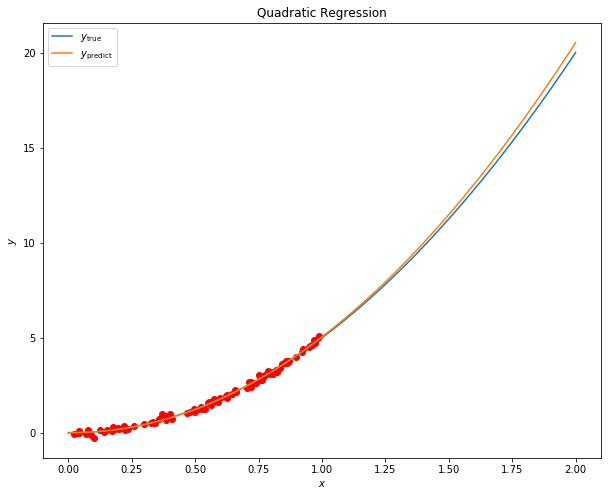

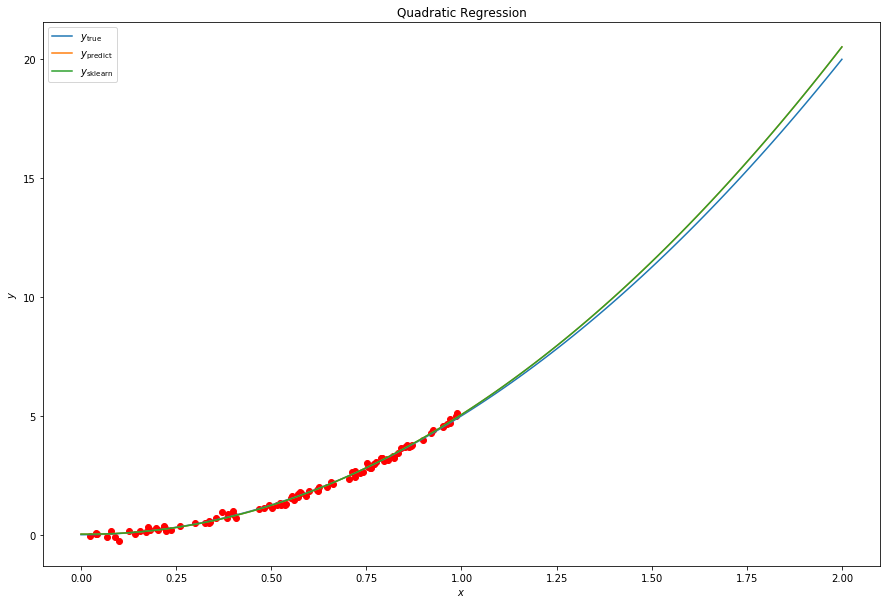

/home/vyasvimal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/home/vyasvimal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


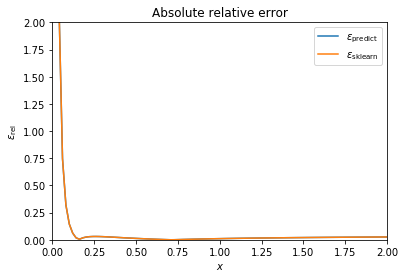

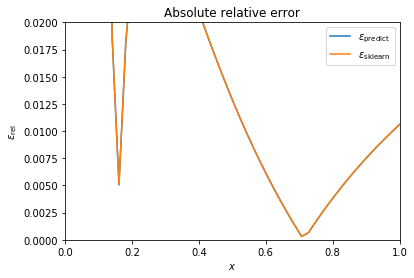

Mean squared error (ypredict): 0.00983670832868819
Mean squared error (ysklearn): 0.009836708328688194
R^2 score (ypredict): 0.9954296415732985
R^2 score (ysklearn): 0.9954296415732985


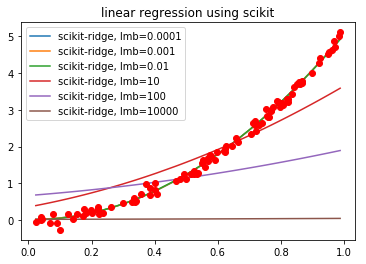

lambda = 0.0001
r2 for scikit: 0.99543
lambda = 0.001
r2 for scikit: 0.995429
lambda = 0.01
r2 for scikit: 0.995404
lambda = 10
r2 for scikit: 0.851273
lambda = 100
r2 for scikit: 0.208041
lambda = 10000
r2 for scikit: -1.66015


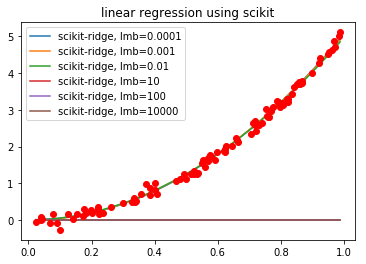

lambda = 0.0001
r2 for scikit: 0.995422
lambda = 0.001
r2 for scikit: 0.995346
lambda = 0.01
r2 for scikit: 0.995029
lambda = 10
r2 for scikit: -1.72572
lambda = 100
r2 for scikit: -1.72572
lambda = 10000
r2 for scikit: -1.72572


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
n = 100 # data points
xmax = 1
error = 0.1

# The following simple Python instructions define our x and y values (with 100 data points)
x = np.random.rand(n,xmax)
y = 5*x*x+error*np.random.randn(n,xmax) # y = 5x^2 + noise

#for xi, yi in zip(x, y):
#    print(xi, yi)
X = np.c_[np.ones((n,1)), x, x*x] # column wise array concatenation
#print(X)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
#print("y = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))
nfit = 100
#xplot = np.arange(nfit)*xmax / (nfit - 1) # nfit points, evenly distributed
xplot =  np.linspace(0,2,nfit)
#print(xplot)
#print(xplot**2)
Xplot = np.c_[np.ones((nfit,1)), xplot, xplot**2] # concatenate columns (as above)
ypredict = Xplot.dot(beta)
ytrue = 5*xplot*xplot

plt.figure(figsize=(10,8))
plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()


from sklearn.linear_model import LinearRegression

clf2 = LinearRegression()
clf2.fit(X, y)
ysklearn = clf2.predict(Xplot)
#print("ypredict = " + str(clf2.coef_[0, 2]) + "*x^2 + " + str(clf2.coef_[0, 1]) + "*x + " + str(clf2.coef_[0, 0]))
#print("ysklearn = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))
# note that the indices are reversed in the scikit-learn approach compared to what we did before:
# the shape is (1, n) instead of (n, 1)

plt.figure(figsize=(15,10))
plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.plot(xplot, ysklearn, label="$y_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()


err_predict = abs(ypredict[:, 0] - ytrue)/abs(ytrue) # the predicted y's have shape (n, 1)
err_sklearn = abs(ysklearn[:, 0] - ytrue)/abs(ytrue)

plt.plot(xplot, err_predict, label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, err_sklearn, label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, 2, 0, 2])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()

plt.plot(xplot, abs(err_predict), label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, abs(err_sklearn), label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, xmax, 0, 0.02])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error

# Note that the y values are not sorted, but ypredict and ysklearn are
# (we used Xplot to find these, not X)
# Thus, done with plotting, let us instead make new predictions based on X

ypredict2 = X.dot(beta)
ysklearn2 = clf2.predict(X)

# Then we find the MSE:

print("Mean squared error (ypredict):", mean_squared_error(y, ypredict2))
print("Mean squared error (ysklearn):", mean_squared_error(y, ysklearn2))
from sklearn.metrics import r2_score

print("R^2 score (ypredict):", r2_score(y, ypredict2))
print("R^2 score (ysklearn):", r2_score(y, ysklearn2))

# Excercise 5

lmb_values = [1e-4, 1e-3, 1e-2, 10, 1e2, 1e4]
num_values = len(lmb_values)

beta_ridge = np.zeros((3,num_values))

I3 = np.eye(3)

for i,lmb in enumerate(lmb_values):
    beta_ridge[:,i] = (np.linalg.inv( X.T @ X + lmb*I3) @ X.T @ y).flatten()

pred_ridge =  X @ beta_ridge


sort_ind = np.argsort(x[:,0])

xplot = x[sort_ind,0]
pred_ridge_plot = pred_ridge[sort_ind,:]

pred_ridge_scikit =  np.zeros((n,num_values))
for i,lmb in enumerate(lmb_values):
    pred_ridge_scikit[:,i] = (Ridge(alpha=lmb,fit_intercept=False).fit(X,y).predict(X)).flatten() # fit_intercept=False fordi bias er allerede i X

plt.figure()

for i in range(num_values):
    plt.plot(xplot,pred_ridge_scikit[sort_ind,i],label='scikit-ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')
plt.legend()
plt.title('linear regression using scikit')

plt.show()

### R2-score of the results
for i in range(num_values):
    print('lambda = %g'%lmb_values[i])
    print('r2 for scikit: %g'%r2_score(y,pred_ridge_scikit[:,i]))
    
    
    
#Lasso

beta_lasso = np.zeros((3,num_values))

I3 = np.eye(3)

for i,lmb in enumerate(lmb_values):
    beta_lasso[:,i] = (np.linalg.inv( X.T @ X + lmb*I3) @ X.T @ y).flatten()

pred_lasso =  X @ beta_lasso


sort_ind = np.argsort(x[:,0])

xplot = x[sort_ind,0]
pred_lasso_plot = pred_lasso[sort_ind,:]

pred_lasso_scikit =  np.zeros((n,num_values))
for i,lmb in enumerate(lmb_values):
    pred_lasso_scikit[:,i] = (Lasso(alpha=lmb,fit_intercept=False).fit(X,y).predict(X)).flatten() # fit_intercept=False fordi bias er allerede i X

plt.figure()

for i in range(num_values):
    plt.plot(xplot,pred_lasso_scikit[sort_ind,i],label='scikit-ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')
plt.legend()
plt.title('linear regression using scikit')

plt.show()

### R2-score of the results
for i in range(num_values):
    print('lambda = %g'%lmb_values[i])
    print('r2 for scikit: %g'%r2_score(y,pred_lasso_scikit[:,i]))
   

   
